In [6]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
from math import sqrt
import scipy.stats as ss
import scipy.optimize as opt
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from pandas_datareader import DataReader
from sklearn.metrics import mean_squared_error

In [7]:
start_date = datetime(2020, 1, 1)
end_date = datetime(2022, 1, 1)

TSLA = yf.download('TSLA', start_date, end_date)
TSLA.reset_index(inplace = True)

RACE = yf.download('RACE', start_date, end_date)
RACE.reset_index(inplace = True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
TSLA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,505.000000,505.000000,505.000000,505.000000,505.000000,5.050000e+02
mean,177.995995,182.005536,173.741933,178.170210,178.170210,1.541917e+08
std,98.445679,100.355924,96.366382,98.526373,98.526373,1.143836e+08
min,24.980000,26.990667,23.367332,24.081333,24.081333,2.940180e+07
25%,81.431999,81.866669,79.040001,80.577332,80.577332,7.175880e+07
50%,200.736664,205.596664,197.833328,201.623337,201.623337,1.143150e+08
75%,239.933334,246.796661,237.136673,243.256668,243.256668,2.124165e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [9]:
RACE.describe()

,Open,High,Low,Close,Adj Close,Volume
count,505.000000,505.000000,505.000000,505.000000,505.000000,5.050000e+02
mean,198.576753,200.255426,196.834956,198.503247,195.022041,3.325869e+05
std,29.183153,29.013191,29.254567,29.164994,29.219053,2.400113e+05
min,129.360001,134.910004,127.730003,129.320007,125.947647,5.380000e+04
25%,176.330002,177.220001,174.479996,176.190002,172.912552,1.837000e+05
50%,201.690002,203.289993,200.250000,202.179993,198.873596,2.614000e+05
75%,214.619995,216.660004,213.559998,214.949997,211.753799,3.967000e+05
max,275.369995,278.779999,273.000000,275.299988,271.509552,1.991000e+06


In [10]:
TSLA['Typical_Price'] = TSLA[['High', 'Low', 'Close']].mean(axis = 1)
TSLA['lRETS'] = (np.log(TSLA.Close) - np.log(TSLA.Close.shift(1))) * 100.
TSLA.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Typical_Price,lRETS
0,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,28.503778,NaN
1,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,29.642889,2.920268
2,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,29.846666,1.907161
3,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,30.978889,3.806671
4,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,32.419111,4.803257


In [11]:
RACE['Typical_Price'] = RACE[['High', 'Low', 'Close']].mean(axis = 1)
RACE['lRETS'] = (np.log(RACE.Close) - np.log(RACE.Close.shift(1))) * 100.
RACE.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Typical_Price,lRETS
0,2020-01-02,167.050003,168.774002,166.630005,168.509995,164.115662,195800,167.971334,NaN
1,2020-01-03,166.759995,167.750000,166.268005,166.729996,162.382065,134600,166.916000,-1.061935
2,2020-01-06,164.759995,166.289993,164.759995,165.850006,161.525024,169900,165.633331,-0.529191
3,2020-01-07,165.979996,166.119995,165.179993,165.220001,160.911453,309300,165.506663,-0.380588
4,2020-01-08,167.039993,168.970001,166.750000,168.539993,164.144867,261400,168.086665,1.989514


/Users/meetdoshi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/meetdoshi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


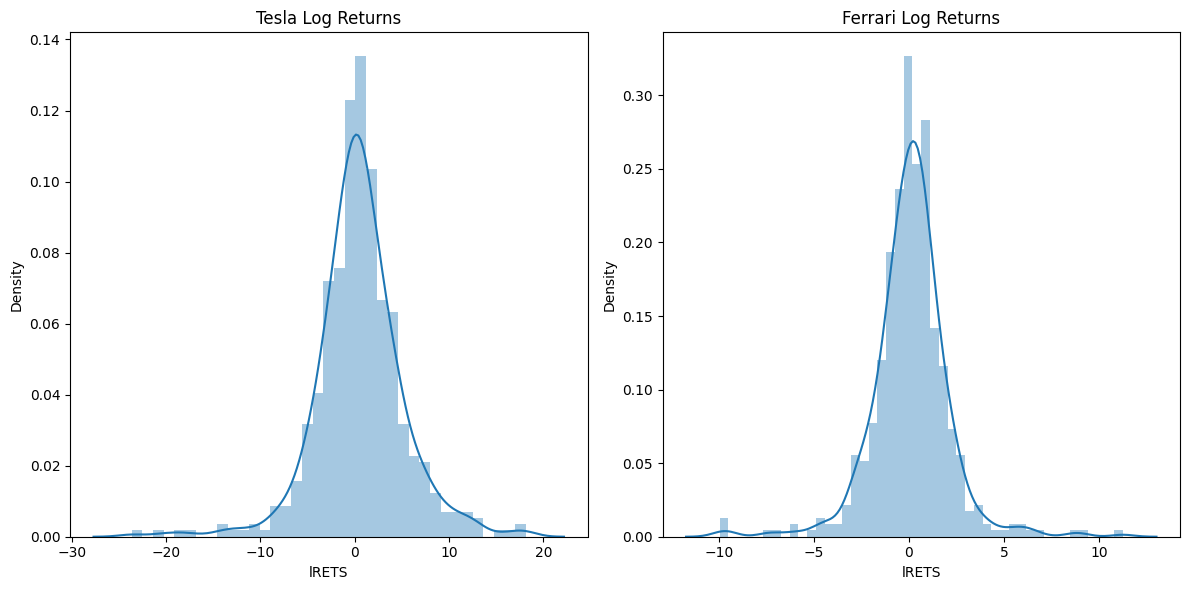

In [12]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6))

sns.distplot(TSLA['lRETS'].dropna(), ax = axes[0])
axes[0].set_title('Tesla Log Returns')

sns.distplot(RACE['lRETS'].dropna(), ax = axes[1])
axes[1].set_title('Ferrari Log Returns')
plt.tight_layout()
plt.show()

Defining the GARCH Model and Likelihood Function:

In [13]:
def GARCH(Y):
    "Initialize Params:"
    mu = param0[0]
    omega = param0[1]
    alpha = param0[2]
    beta = param0[3]
    T = Y.shape[0]
    GARCH_Dens = np.zeros(T)
    sigma2 = np.zeros(T)
    F = np.zeros(T)
    v = np.zeros(T)
    for t in range(1,T):
        sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]);
        F[t] = Y[t] - mu-np.sqrt(sigma2[t])*np.random.normal(0,1,1)
        v[t] = sigma2[t]
        GARCH_Dens[t] = (1/2)*np.log(2*np.pi)+(1/2)*np.log(v[t])+(1/2)*(F[t]/v[t])
        Likelihood = np.sum(GARCH_Dens[1:-1])
    return Likelihood

In [14]:
def GARCH_Prod(params, Y0, T):
    mu = params[0]
    omega = params[1]
    alpha = params[2]
    beta = params[3]
    Y = np.zeros(T)
    sigma2 = np.zeros(T)
    Y[0] = Y0
    sigma2[0] = 0.0001
    for t in range(1,T):
        sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]);
        Y[t] = mu+np.sqrt(sigma2[t])*np.random.normal(0,1,1)
    return Y

         Current function value: 0.527898
         Iterations: 1
         Function evaluations: 96
         Gradient evaluations: 17


/var/folders/p6/09_jyd9922d_qcbtp4sgzp3h0000gn/T/ipykernel_62037/328700814.py:5: OptimizeWarning: Unknown solver options: xtol
  param_star = opt.minimize(GARCH, param0, method ='BFGS' , options = {'xtol' : 1e-8, 'disp' : True})


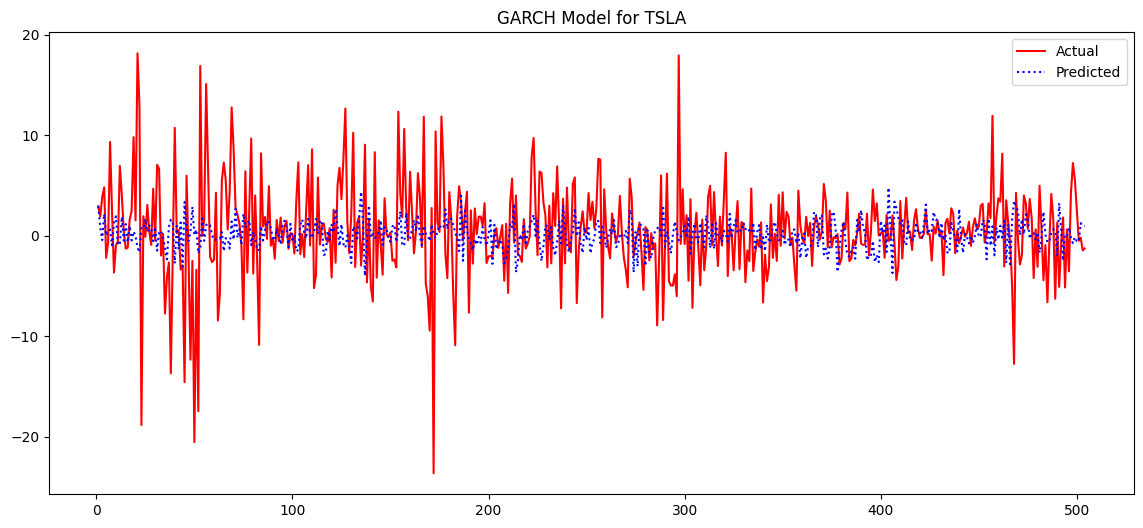

In [15]:
Y = TSLA['lRETS'].dropna()
T = len(Y)

param0 = np.array([0.1, 0.6, 0.15, 0.5])
param_star = opt.minimize(GARCH, param0, method ='BFGS' , options = {'xtol' : 1e-8, 'disp' : True})

Y_GARCH = GARCH_Prod(param_star.x, Y[1], T)
timevec = np.linspace(1, T, T)

fig = plt.figure(figsize = (14, 6))
plt.plot(timevec, Y, 'r-', label = 'Actual')
plt.plot(timevec, Y_GARCH, 'b:', label = 'Predicted')

plt.legend(loc = 'upper right')
plt.title("GARCH Model for TSLA")
plt.show()

In [16]:
GARCH_TSLA = pd.DataFrame({'Actual':list(Y), 'Predicted':list(Y_GARCH)})
GARCH_TSLA

,Actual,Predicted
0,2.920268,2.920268
1,1.907161,0.881051
2,3.806671,-0.442993
3,4.803257,2.150815
4,-2.218939,0.005037
...,...,...
499,2.493492,-0.556167
500,-0.501282,-0.608919
501,-0.209691,1.236279
502,-1.469978,0.934229


In [17]:
RMS_TSLA = sqrt(mean_squared_error(GARCH_TSLA['Actual'], GARCH_TSLA['Predicted']))
RMS_TSLA

4.994646265972854

         Current function value: -1.310628
         Iterations: 2
         Function evaluations: 146
         Gradient evaluations: 25


/var/folders/p6/09_jyd9922d_qcbtp4sgzp3h0000gn/T/ipykernel_62037/4211405203.py:5: OptimizeWarning: Unknown solver options: xtol
  param_star = opt.minimize(GARCH, param0, method = 'BFGS' , options = {'xtol' : 1e-8, 'disp' : True})


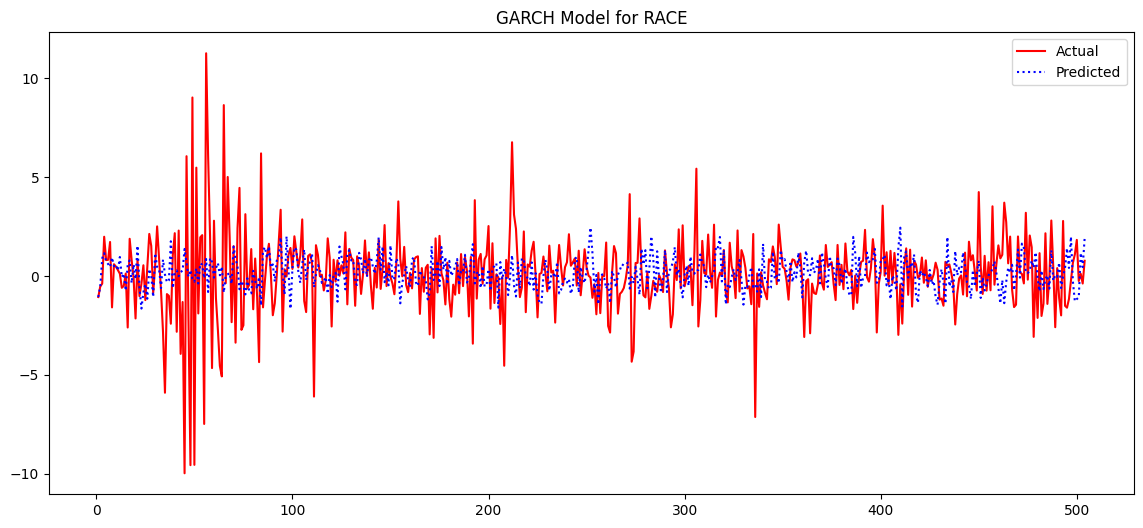

In [18]:
Y = RACE['lRETS'].dropna()
T = len(Y)

param0 = np.array([0.18, 0.27, 0.15, 0.4])
param_star = opt.minimize(GARCH, param0, method = 'BFGS' , options = {'xtol' : 1e-8, 'disp' : True})
Y_GARCH = GARCH_Prod(param_star.x,Y[1],T)
timevec = np.linspace(1,T,T)

fig = plt.figure(figsize = (14,6))
plt.plot(timevec, Y, 'r-', label = 'Actual')
plt.plot(timevec, Y_GARCH, 'b:', label = 'Predicted')

plt.legend(loc = 'upper right')
plt.title("GARCH Model for RACE")
plt.show()

In [19]:
GARCH_RACE = pd.DataFrame({'Actual':list(Y), 'Predicted':list(Y_GARCH)})
GARCH_RACE

,Actual,Predicted
0,-1.061935,-1.061935
1,-0.529191,-0.533337
2,-0.380588,0.898938
3,1.989514,1.157871
4,0.809584,0.735721
...,...,...
499,1.829608,-1.163404
500,-0.248241,-1.081547
501,0.116432,1.173046
502,-0.376971,0.451791


In [20]:
RMS_RACE = sqrt(mean_squared_error(GARCH_RACE['Actual'], GARCH_RACE['Predicted']))
RMS_RACE

2.211437049164513

In [69]:
y_pred = [] * 1000

for i in range(len(GARCH_TSLA)+1):
    if i == 0:
        y_pred.append(30)
        # y_pred.append(math.exp(GARCH_TSLA['Predicted'][i]/100) * TSLA['Close'][i])
    else:
        # y_pred.append(math.exp(GARCH_TSLA['Predicted'][i]/100) * TSLA['Close'][i])
        y_pred.append(math.exp(GARCH_TSLA['Predicted'][i-1]/100) * y_pred[i-1])

In [70]:
TSLA_Pred = pd.DataFrame({'Actual_Close_Price': TSLA['Close'], 'Predicted_Close_Price': list(y_pred), 'Date': TSLA.index})
TSLA_Pred.set_index('Date', inplace = True)

In [71]:
TSLA_Pred

,Actual_Close_Price,Predicted_Close_Price
Date,,
0,28.684000,30.000000
1,29.534000,30.888998
2,30.102667,31.162348
3,31.270666,31.024606
4,32.809334,31.699116
...,...,...
500,364.646667,56.529204
501,362.823334,56.186033
502,362.063324,56.884960


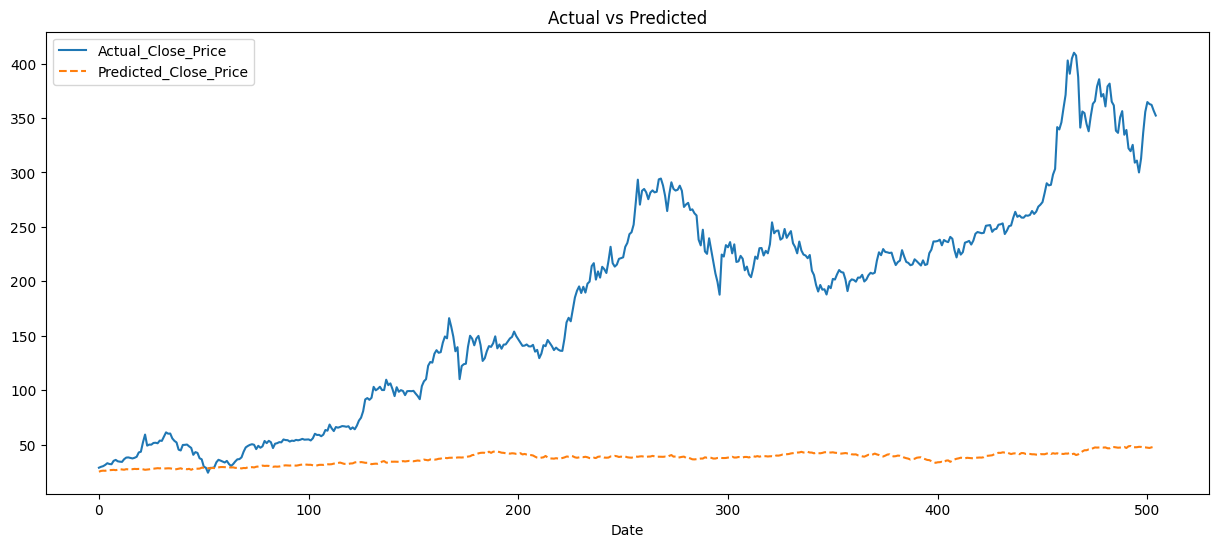

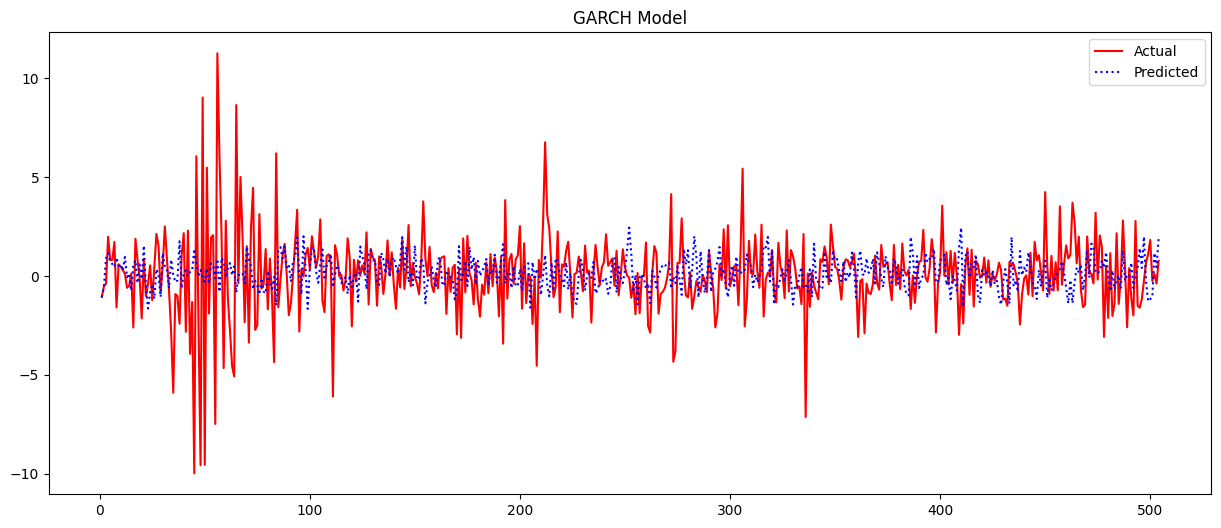

In [48]:
TSLA_Pred[['Actual_Close_Price', 'Predicted_Close_Price']].loc[:].plot(figsize = (15, 6), style = ['-', '--'], title = 'Actual vs Predicted')
fig = plt.figure(figsize = (15, 6))
plt.plot(timevec, Y, 'r-', label = 'Actual')
plt.plot(timevec, Y_GARCH, 'b:', label = 'Predicted')
plt.legend(loc = 'upper right')
plt.title("GARCH Model")
plt.show()

Trading Strategy



In [49]:
signal = 0
amount = 10000
Amount = []
balance = 0
action = []
portfolio = 0
Portfolio = []
stocks = 0
Stocks = []


for i in range(len(TSLA_Pred)-1):
    if TSLA_Pred['Predicted_Close_Price'][i+1] > TSLA_Pred['Actual_Close_Price'][i]:
        if signal == 0:
            action.append('Buy')
            stocks = int(amount / TSLA_Pred['Actual_Close_Price'][i])
            balance = int(amount % TSLA_Pred['Actual_Close_Price'][i])
            portfolio = stocks * TSLA_Pred['Actual_Close_Price'][i]
            signal = 1
            amount = portfolio + balance
            print('Stock:', TSLA_Pred['Actual_Close_Price'][i] , 'Action:', action[i], 'Portfolio:', round(portfolio,2), 'Stocks:', stocks, 'Balance_init:', balance, 'Total($)', round(amount,2))
            Portfolio.append(round(portfolio, 5))
            Amount.append(round(amount, 0))
            Stocks.append(stocks)
        else:
            action.append('Bought--Holding')
            portfolio = stocks * TSLA_Pred['Actual_Close_Price'][i]
            amount = portfolio + balance
            print('Stock:', TSLA_Pred['Actual_Close_Price'][i], 'Action:',action[i], 'Portfolio:', round(portfolio,2), 'Stocks:', stocks, 'Balance_init:', balance, 'Total($)', round(amount,2))
            Portfolio.append(round(portfolio, 5))
            Amount.append(round(amount, 0))
            Stocks.append(stocks)

    elif TSLA_Pred['Predicted_Close_Price'][i+1] < TSLA_Pred['Actual_Close_Price'][i]:
        if signal == 1:
            action.append('Sell')
            portfolio = stocks * TSLA_Pred['Actual_Close_Price'][i]
            signal = 0
            stocks = 0
            amount = balance + portfolio
            portfolio = 0
            balance = 0
            print('Stock:', TSLA_Pred['Actual_Close_Price'][i], 'Action:', action[i], 'Portfolio:', round(portfolio,2), 'Stocks:', stocks, 'Balance_init:', balance, 'Total($)', round(amount,2))
            Portfolio.append(round(portfolio, 5))
            Amount.append(round(amount, 0))
            Stocks.append(stocks)
        else:
            action.append('Price-Prediction-Already-Lower')
            print('Stock:',TSLA_Pred['Actual_Close_Price'][i], 'Action:', action[i], 'Portfolio:', round(portfolio,2), 'Stocks:', stocks, 'Balance_init:', balance, 'Total($)', round(amount,2))
            Portfolio.append(round(portfolio, 5))
            Amount.append(round(amount, 0))
            Stocks.append(stocks)

    print('\n')

Stock: 28.68400001525879 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 Total($) 10000


Stock: 29.534000396728516 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 Total($) 10000


Stock: 30.1026668548584 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 Total($) 10000


Stock: 31.270666122436523 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 Total($) 10000


Stock: 32.80933380126953 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 Total($) 10000


Stock: 32.089332580566406 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 Total($) 10000


Stock: 31.876667022705078 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 Total($) 10000


Stock: 34.990665435791016 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 Total($) 10000


Stock: 35.861331939697266 Action: Pr

In [53]:
Strategy_Result = pd.DataFrame({'Actual_Close_Price': TSLA['Close'][1:],
                               'Predicted_Close_Price': list(y_pred[1:]),
                               'Date': TSLA.index[1:],
                               'Action': action,
                               'Amount($)':Amount,
                               'Portfolio($)': Portfolio,
                               'Stocks': Stocks})

Strategy_Result.head()

,Actual_Close_Price,Predicted_Close_Price,Date,Action,Amount($),Portfolio($),Stocks
1,29.534000,25.740831,1,Price-Prediction-Already-Lower,10000.0,0.0,0
2,30.102667,25.968623,2,Price-Prediction-Already-Lower,10000.0,0.0,0
3,31.270666,25.853839,3,Price-Prediction-Already-Lower,10000.0,0.0,0
4,32.809334,26.415930,4,Price-Prediction-Already-Lower,10000.0,0.0,0
5,32.089333,26.417260,5,Price-Prediction-Already-Lower,10000.0,0.0,0


<Axes: title={'center': 'Total Amount'}>

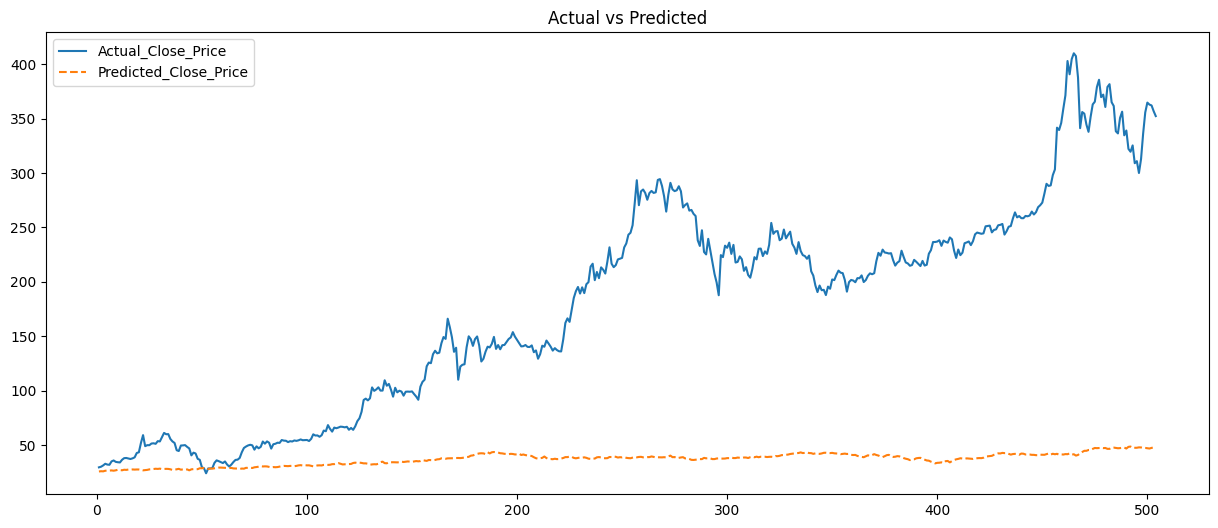

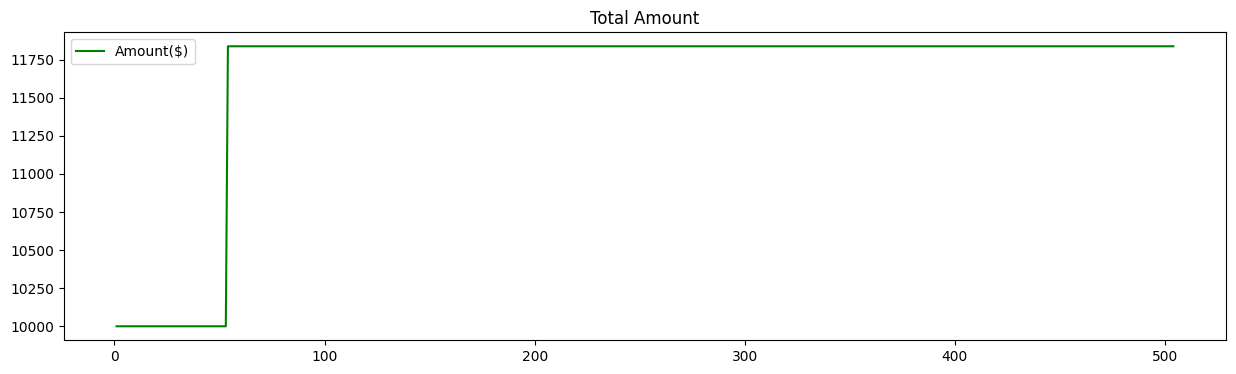

In [51]:
Strategy_Result[['Actual_Close_Price', 'Predicted_Close_Price']].loc[:].plot(figsize = (15, 6), style = ['-', '--'], title = 'Actual vs Predicted')
Strategy_Result[['Amount($)']].iloc[0:].plot(figsize = (15, 4), style = ['-g'], title = 'Total Amount')

In [ ]:
Profit = (Amount[-1] / 10000) - 1  # Assuming Amount[-1] represents the final amount
Profit_percent = Profit * 100

print('Initial Investment: $10,000')
print('Final Amount:', Amount[-1], '$')
print('Profit Percentage:', Profit_percent, '%')

Initial Investment: $10,000
Final Amount: 15730.0 $
Profit Percentage: 57.3 %
